# Potovanje
Projekt pri predmetu Programiranje 1, ko smo se učili obdelave podatkov. Podatke sem zajemala iz [te spletne strani](https://www.booking.com/). Za vsak vikend v obdobju od 3. februarja do 31. decembra 2017 sem poiskala 200 najugodnejših ponudb za 2 nočitvi za 2 odrasli osebi.

## Zajeti podatki

* ID hotela
* Ime hotela
* Oddaljenost od centra
* Ocena gostov
* Možnost brezplačnega preklica
* Kratek opis hotela
* Datum začetka vikenda - petkov datum
* Cena za 2 nočitvi za 2 odrasli osebi

## Analiza

V analizi bom najprej prikazala datoteke, iz katerih bom potem črpala informacije, da bom lahko odgovorila na naslednja vprašanja:
* Kdaj se najbolj splača prespati v Londonu in koliko denarja je potrebno za to odšteti?
* Kako se v povprečju spreminjajo cene skozi celo leto?
* Ali so hoteli z boljšo oceno tudi bliže centru?
* Kolikšna je razlika v ceni med najbolj in najmanj luksuznimi namestitvami?
* Ali obstaja korelacija med ceno in možnostjo brezplačnega preklica rezervacije?
* Kakšna je cena namestitve v odvisnosti od razdalje do centra?

Uvodne vrstice za delo s orodjem pandas.

In [87]:
# naložimo paket
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 20)

# naložimo datoteke, ki jih bomo uporabljali pri analizi
london = pd.read_csv('LONDON.csv')
hoteli = pd.read_csv('LONDON_Hoteli.csv')

c:\program files (x86)\python35-32\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


Zdaj pa zares! 
V datoteki spodaj so zajeti naslednji podatki : datum začetka vikenda (petek), ID hotela in ceno namestitve za 2 noči za 2 odrasli osebi.

In [88]:
london[:10]

,friday,hotelId,price
0,2017-02-03,537268,450
1,2017-02-03,18561,200
2,2017-02-03,28146,472
3,2017-02-03,21688,124
4,2017-02-03,8466215,200
5,2017-02-03,15246530,169
6,2017-02-03,20098,539
7,2017-02-03,5169,284
8,2017-02-03,3849185,586
9,2017-02-03,8563,358


V datoteki spodaj so zajeti podatki o hotelih: ID hotela, ime, razdalja do središča, ocena gostov, ali je možnost brezplačne prekinitve rezervacije in kratek opis.

In [89]:
hoteli[:3]

,hotelId,name,proximityDistance,guestRating,freeCancellation,shortDescription
0,537268,Rosewood London,1.33,4.8,True,Rosewood London is centrally located; just a f...
1,18561,The Kensington Hotel,3.88,4.5,False,Located in South Kensington; this luxury hotel...
2,28146,The Ritz London,0.97,4.6,True,This seven-story London hotel is centrally loc...


Spodaj pa si lahko ogledamo združeno tabelo, kjer so prikazane vse namestitve z dodanimi podatki o hotelih.

In [90]:
merged = london.merge(hoteli, on= 'hotelId')
merged[:3]

,friday,hotelId,price,name,proximityDistance,guestRating,freeCancellation,shortDescription
0,2017-02-03,537268,450,Rosewood London,1.33,4.8,True,Rosewood London is centrally located; just a f...
1,2017-02-10,537268,450,Rosewood London,1.33,4.8,True,Rosewood London is centrally located; just a f...
2,2017-02-17,537268,501,Rosewood London,1.33,4.8,True,Rosewood London is centrally located; just a f...


### Kdaj se najbolj splača prespati v Londonu in koliko denarja je potrebno za to odšteti?

In [91]:
urejeni_po_ceni = london.sort_values('price')   
urejeni_po_ceni[:3]                                           ############popravi na prvih 20 vrstic!!!

,friday,hotelId,price
7978,2017-11-03,6882056,62
9376,2017-12-22,1050347,63
3757,2017-06-09,10186970,66


Odgovor: Najcenejša nočitev je 3. novembra 2017 in stane samo 62 dolarjev. 
Če pogledamo malo širše: najcenejših 20 ponudb se giblje med 62 in 74 dolarji. Koliko je to evrov, lahko preverite [tukaj](http://www.xe.com/currencyconverter/convert/?Amount=62&From=USD&To=EUR). Če pogledamo datume, lahko opazimo, da so prisotni predvsem meseci iz druge polovice leta. Morda je takrat še bolj deževno in vetrovno kot ponavadi, kdo bi vedel. :)

### Kako se v povprečju spreminjajo cene skozi celo leto?

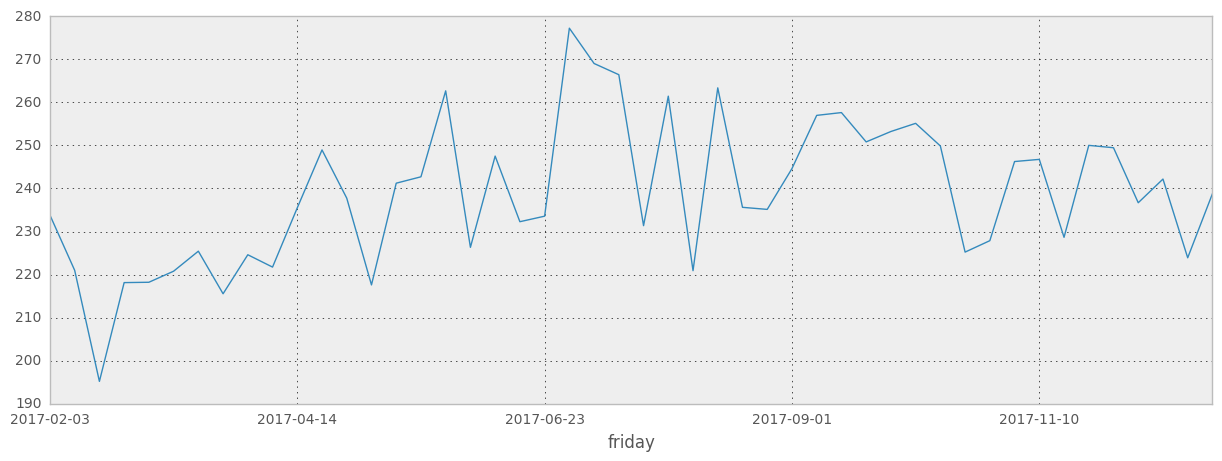

In [92]:
london_po_datumih = london.groupby("friday")
london_po_datumih["price"].mean().plot()

Cene kar precej poskakujejo, vendar pa lahko zaznamo naraščanje v prvi polovici leta in potem zopet padanje v drugi polovici leta. Najdražje nočitve so v povprečju junija, najcenejše pa marca.

### Ali so hoteli z boljšo oceno tudi bliže centru?

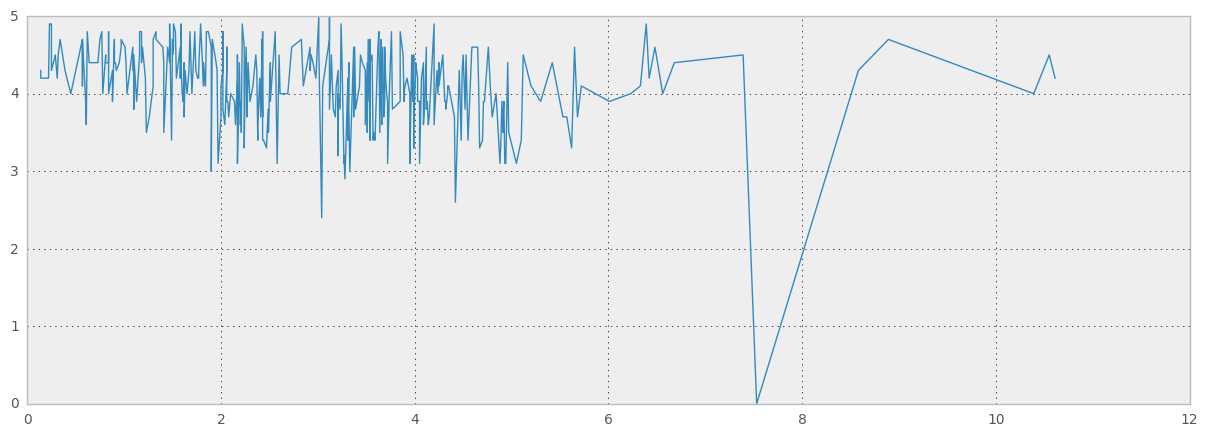

In [93]:
razdalje = merged['proximityDistance']
ocene = merged['guestRating']
razdalje, ocene = zip(*sorted(zip(razdalje,ocene), key=lambda x: x[0]))
plt.plot(razdalje, ocene)

Iz grafa se težko razbere kakšno smiselno povezavo med oddaljenostjo od centra in oceno gostov. Verjetno k temu pripomorejo dejavniki, ki jih v analizi nisem zajela, npr možnost uporabe in kvaliteta wifija ali kaj podobnega.
Opazka: Graf od 6 milje naprej ni reprezentativen. Če bi bil, bi lahko posplošili, da je je ocena vseh hotelov med 7,5 in 8 miljami tako nizka, pa temu gotovo ni tako. To pripisujem premajhnemu številu hotelov na tej razdalji. Po pogledu v osnovno tabelo, sem ugotovila, da se na razdalji 7.53 milje nahaja hotel Apartment Wharf - Discovery Dock West, ki ima oceno 0, kar pomeni, da nima sploh ocene.

### Kolikšna je razlika v ceni med najbolj in najmanj luksuznimi namestitvami?

In [94]:
urejeni_po_ceni_skupno = merged.sort_values('price')
najcenejsi = urejeni_po_ceni_skupno[:200]
najdrazji = urejeni_po_ceni_skupno[-200:]
urejeni_po_ceni_skupno[:10]

,friday,hotelId,price,name,proximityDistance,guestRating,freeCancellation,shortDescription
9333,2017-11-03,6882056,62,Central Hotel,2.43,3.4,False,Located in London City Centre; this hotel is w...
9579,2017-12-22,1050347,63,ibis London Excel Docklands,10.39,4.0,False,Located in Canary Wharf; this hotel is 0.2 mi ...
9339,2017-06-09,10186970,66,Belgrave House Hotel,1.97,3.1,False,Located in London City Centre; this hotel is w...
9341,2017-06-23,10186970,67,Belgrave House Hotel,1.97,3.1,False,Located in London City Centre; this hotel is w...
8969,2017-12-22,1381443,70,Elysee Hotel,3.54,3.4,False,Located in London City Centre; this hotel is w...
8296,2017-12-22,14264,71,ibis London Earls Court,5.53,3.7,False,Located in London City Centre; this hotel is w...
9344,2017-07-21,10186970,73,Belgrave House Hotel,1.97,3.1,False,Located in London City Centre; this hotel is w...
9345,2017-08-04,10186970,73,Belgrave House Hotel,1.97,3.1,False,Located in London City Centre; this hotel is w...
9351,2017-09-22,10186970,73,Belgrave House Hotel,1.97,3.1,False,Located in London City Centre; this hotel is w...
9352,2017-09-29,10186970,73,Belgrave House Hotel,1.97,3.1,False,Located in London City Centre; this hotel is w...


In [95]:
urejeni_po_ceni_skupno[-10:]

,friday,hotelId,price,name,proximityDistance,guestRating,freeCancellation,shortDescription
2480,2017-08-18,21208,975,The Dorchester Hotel,1.73,4.8,True,Located in London City Centre; this luxury hot...
2483,2017-09-08,21208,975,The Dorchester Hotel,1.73,4.8,True,Located in London City Centre; this luxury hot...
2481,2017-08-25,21208,975,The Dorchester Hotel,1.73,4.8,True,Located in London City Centre; this luxury hot...
2474,2017-07-07,21208,975,The Dorchester Hotel,1.73,4.8,True,Located in London City Centre; this luxury hot...
3137,2017-10-06,21364,993,The Connaught,1.53,4.8,True,Located in London City Centre; this family-fri...
6546,2017-02-03,15588,1022,Claridge's,1.51,4.6,True,A 5-star luxury hotel in London's West End; Cl...
2493,2017-11-17,21208,1030,The Dorchester Hotel,1.73,4.8,True,Located in London City Centre; this luxury hot...
266,2017-08-04,20098,1060,Four Seasons Hotel London at Park Lane,1.59,4.9,True,This family-friendly London hotel is located i...
2482,2017-09-01,21208,1168,The Dorchester Hotel,1.73,4.8,True,Located in London City Centre; this luxury hot...
337,2017-02-10,3849185,1851,Corinthia Hotel London,0.25,4.9,True,Located in London City Centre; this luxury hot...


In [96]:
najcenejsi.mean()

hotelId              4337316.905
price                     84.335
proximityDistance          3.985
guestRating                3.514
freeCancellation           0.125
dtype: float64

In [97]:
najdrazji.mean()

hotelId              838893.1450
price                   761.7300
proximityDistance         1.2001
guestRating               4.7545
freeCancellation          0.9900
dtype: float64

Za vzorec sem vzela 200 najcenejših in 200 najdražjih ponudb. Razlika v povprečni ceni je kar 677,395 dolarjev. Koliko je to evrov, lahko preverite [tukaj](http://www.xe.com/currencyconverter/convert/?Amount=677.395&From=USD&To=EUR). Razlika med najcenejšo in najdražjo ponudbo pa je kar 1789 dolarjev. 

### Ali obstaja korelacija med ceno in možnostjo brezplačnega preklica rezervacije?

Iz zgornjih dveh izračunov povprečnih vrednosti za najcenejše in najdražje namestitve lahko razberemo tudi ta podatek. V najdražjih hotelih je možnost, da je prekinitev rezervacije brezplačna kar 99%, medtem ko je v hotelih, ki nudijo najcenejšo namestitev ta možnost zgolj 12,5 %.

### Kakšna je cena namestitve v odvisnosti od razdalje do centra?

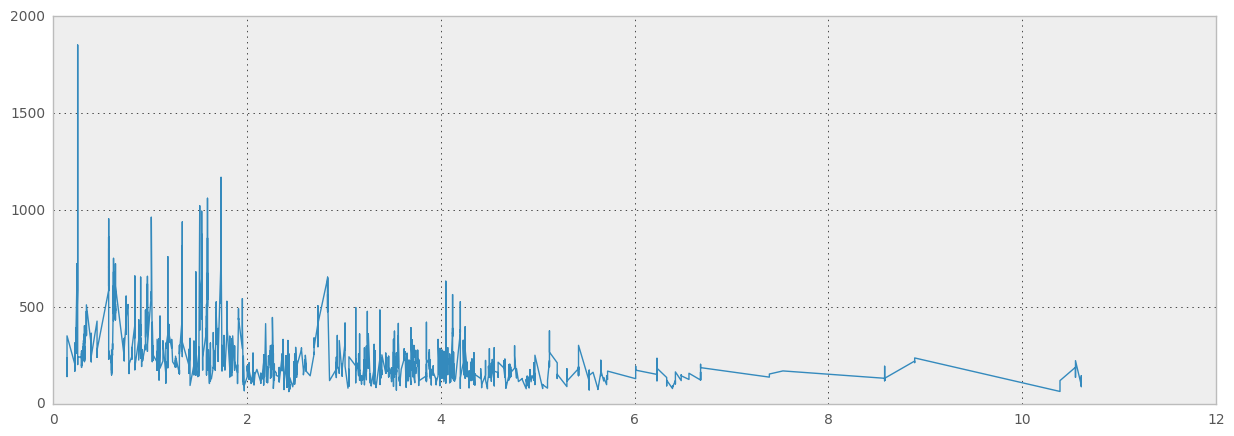

In [98]:
razdalje = merged['proximityDistance']
cene = merged['price']
razdalje, cene = zip(*sorted(zip(razdalje,cene), key=lambda x: x[0]))
plt.plot(razdalje, cene)

Preden sem naredila analizo, sem postavila hipotezo, da cena z razdaljo pada. Graf to hipotezo potrdi z nekaj izjemami, ki jih pripisujem dejstvu, da je lahko tudi kakšen bolj udobno opremljen hotel, ki ni ravno v centru, pa ima vseeno malo višjo ceno.

Tako! Z odgovorom na še zadnje zastavljeno vprašanje zaključujem svojo analizo. Tako analizo bi lahko naredili za poljubno mesto. Vse, kar je treba spremeniti, je naslednje: v [tej datoteki](https://github.com/KorosecN13/Potovanje/blob/master/potovanje.py) nastaviti drugo mesto, pognati program, si vmes skuhati eno kavo ali pa 2, in še enkrat zagnati vse celice v tem jupyter notebooku in analiza se lahko prične. Obilico veselja! 